In [1]:
# All the libraries needed for the project are loaded
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import warnings

np.random.seed(0)
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)
data = pd.read_csv('/content/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape
temp = data.isnull().sum().to_frame()
temp.columns = ['Missing data points']
temp

,Missing data points
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


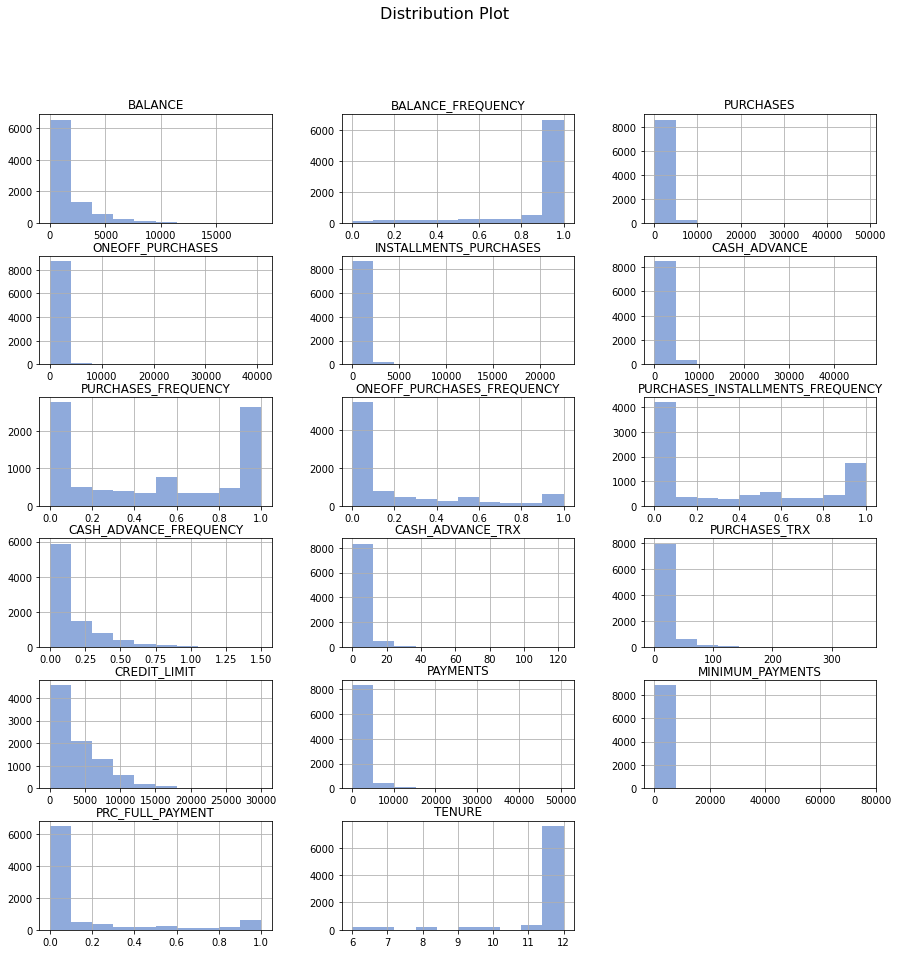

In [12]:
# Filling up the missing elements with median of the 'MINIMUM_PAYMENT' 
data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()
# Handling NaN value from 'CREDIT_LIMIT'
avg = data['CREDIT_LIMIT'].mean()
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(avg)
# Let's see if we have duplicated entries in the data
data.duplicated().sum()
temp = data.isnull().sum().to_frame()
temp.columns = ['Missing data points']
temp

# Dropping 'CUST_ID' column
# data.drop('CUST_ID', axis=1, inplace=True)
# Distribution plot showing distributop for every behavior variable
import pylab as pl

data.hist(bins=10, figsize=(15, 15), facecolor='#4472C4',alpha=0.6, layout=(6,3))
pl.suptitle("Distribution Plot", size=16)
plt.show()


In [13]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


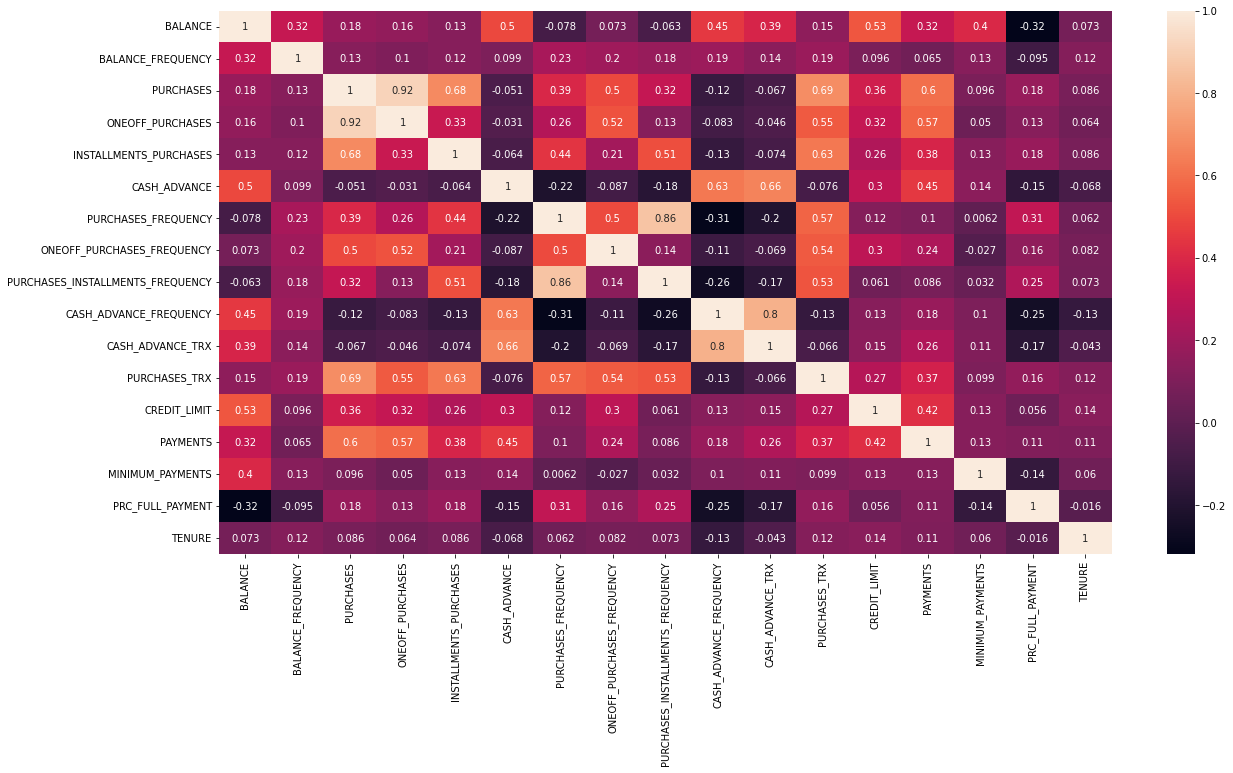

In [14]:
# Correlation Matrix plot
fig, axes = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

In [15]:
# Top 10 pair of variables with the highest correlation
corr = data.corr()
c1 = corr.abs().unstack()
c1 = c1.sort_values(ascending = False)
c1 = pd.DataFrame(c1)
c1.reset_index(inplace=True)
c1.columns = ['V1', 'V2', 'Abs Corr']
c1 = c1[~(c1['V1']==c1['V2'])]
c1.drop_duplicates(subset='Abs Corr', inplace=True)
c1.head(10)

,V1,V2,Abs Corr
17,PURCHASES,ONEOFF_PURCHASES,0.916845
19,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,0.862934
21,CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY,0.799561
23,PURCHASES_TRX,PURCHASES,0.689561
25,PURCHASES,INSTALLMENTS_PURCHASES,0.679896
27,CASH_ADVANCE_TRX,CASH_ADVANCE,0.656498
29,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,0.628522
31,PURCHASES_TRX,INSTALLMENTS_PURCHASES,0.628108
33,PAYMENTS,PURCHASES,0.603264
35,PURCHASES_TRX,PURCHASES_FREQUENCY,0.568430


Text(0.5, 1.08, 'Component by component plot')

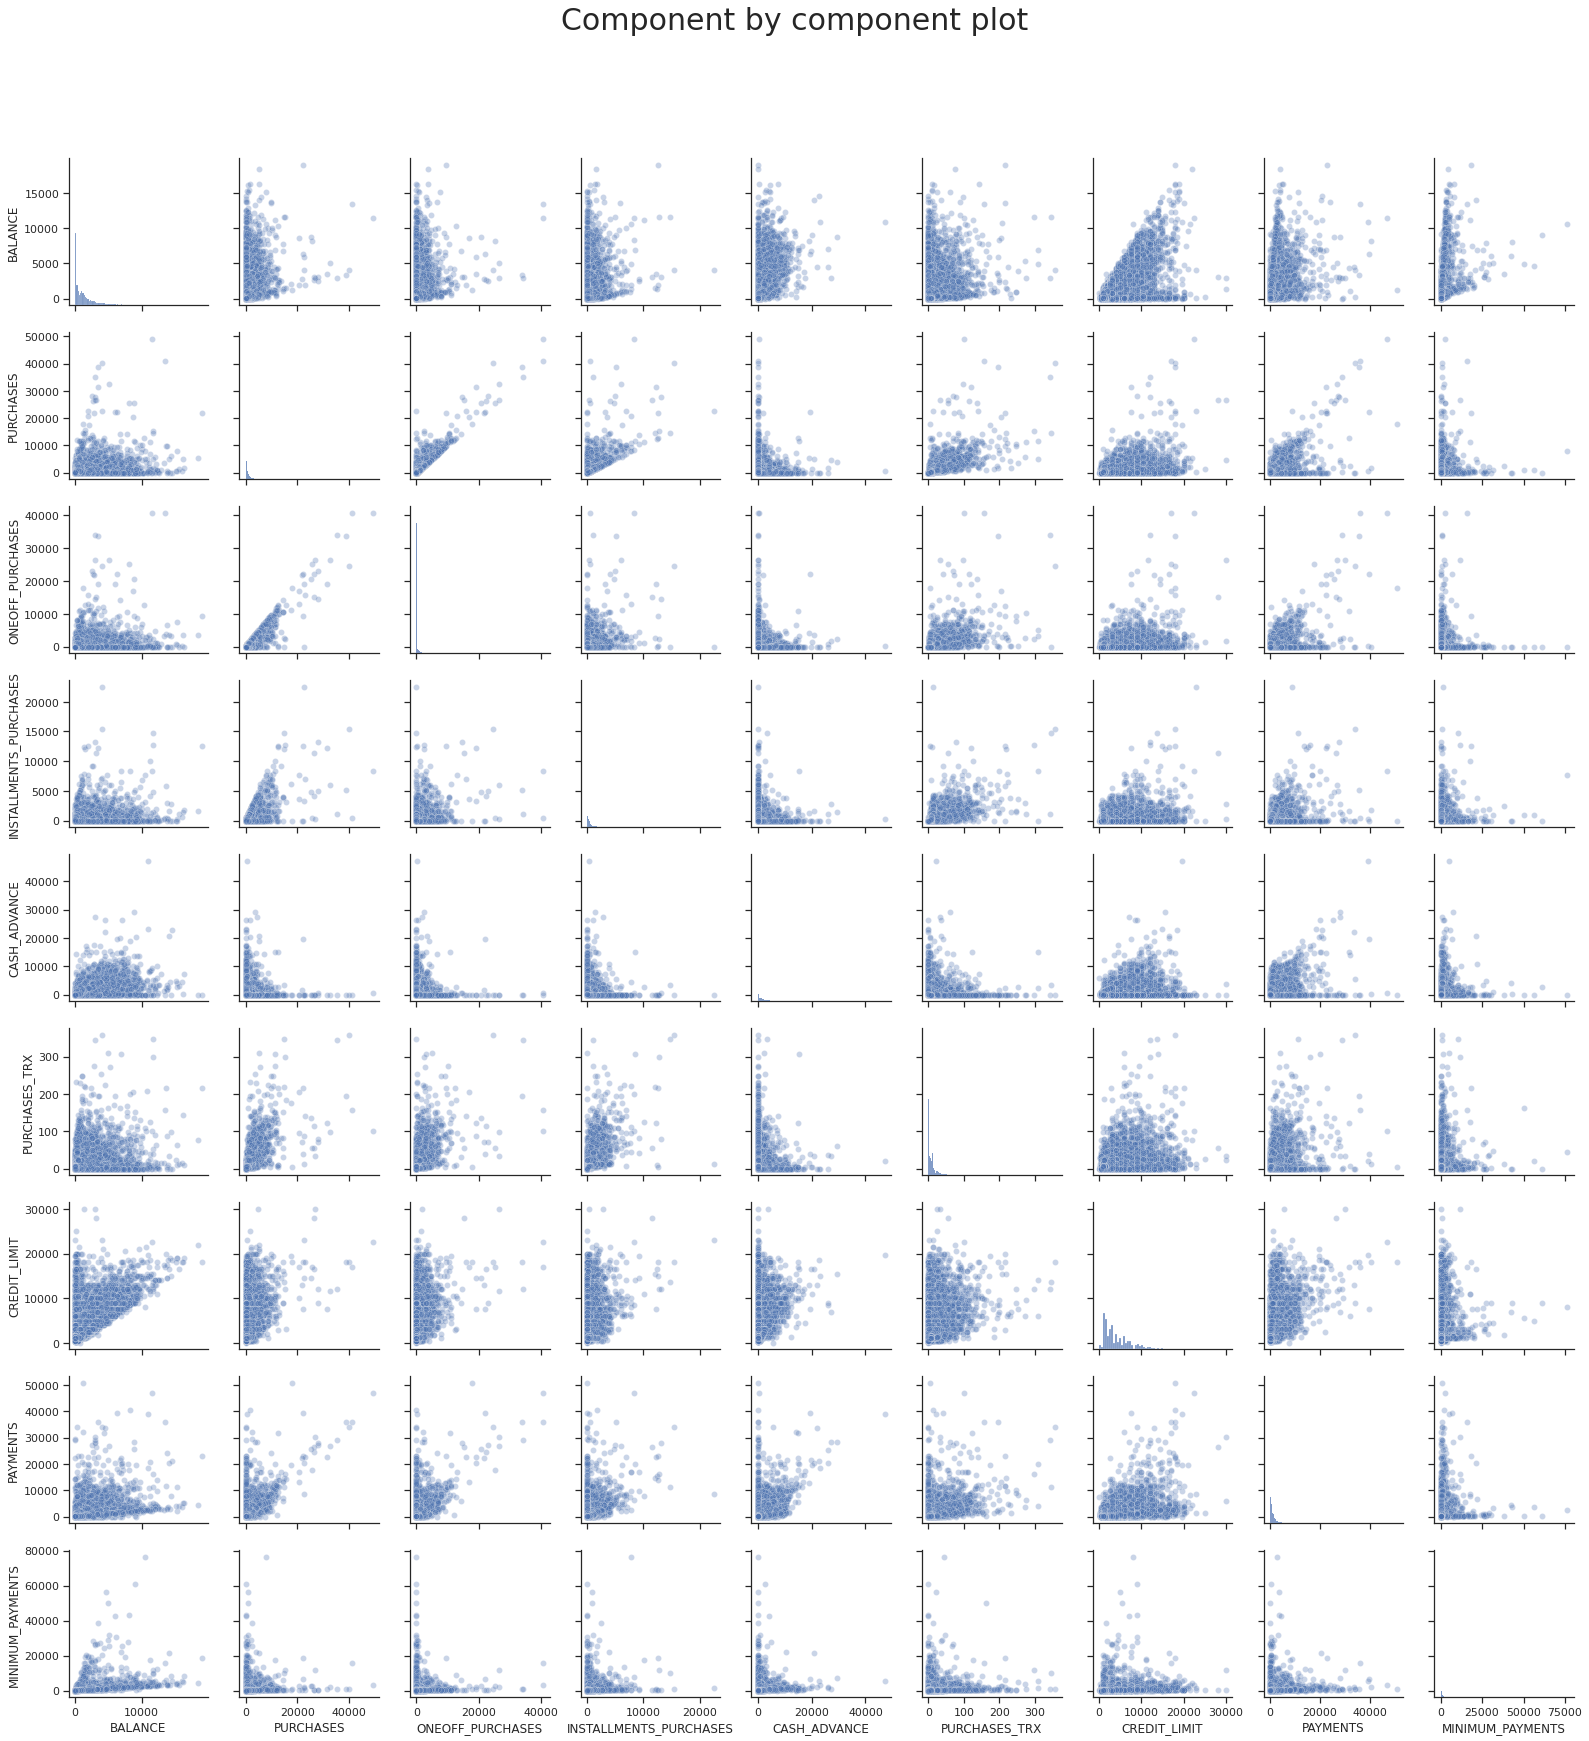

In [17]:
# Less dicrete variables
cont_cols=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
   'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
# Component by component plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data[cont_cols],  plot_kws={'alpha':0.3})
g.fig.suptitle("Component by component plot", fontsize=30, y=1.08)

Text(0.5, 1.08, 'Component by component plot')

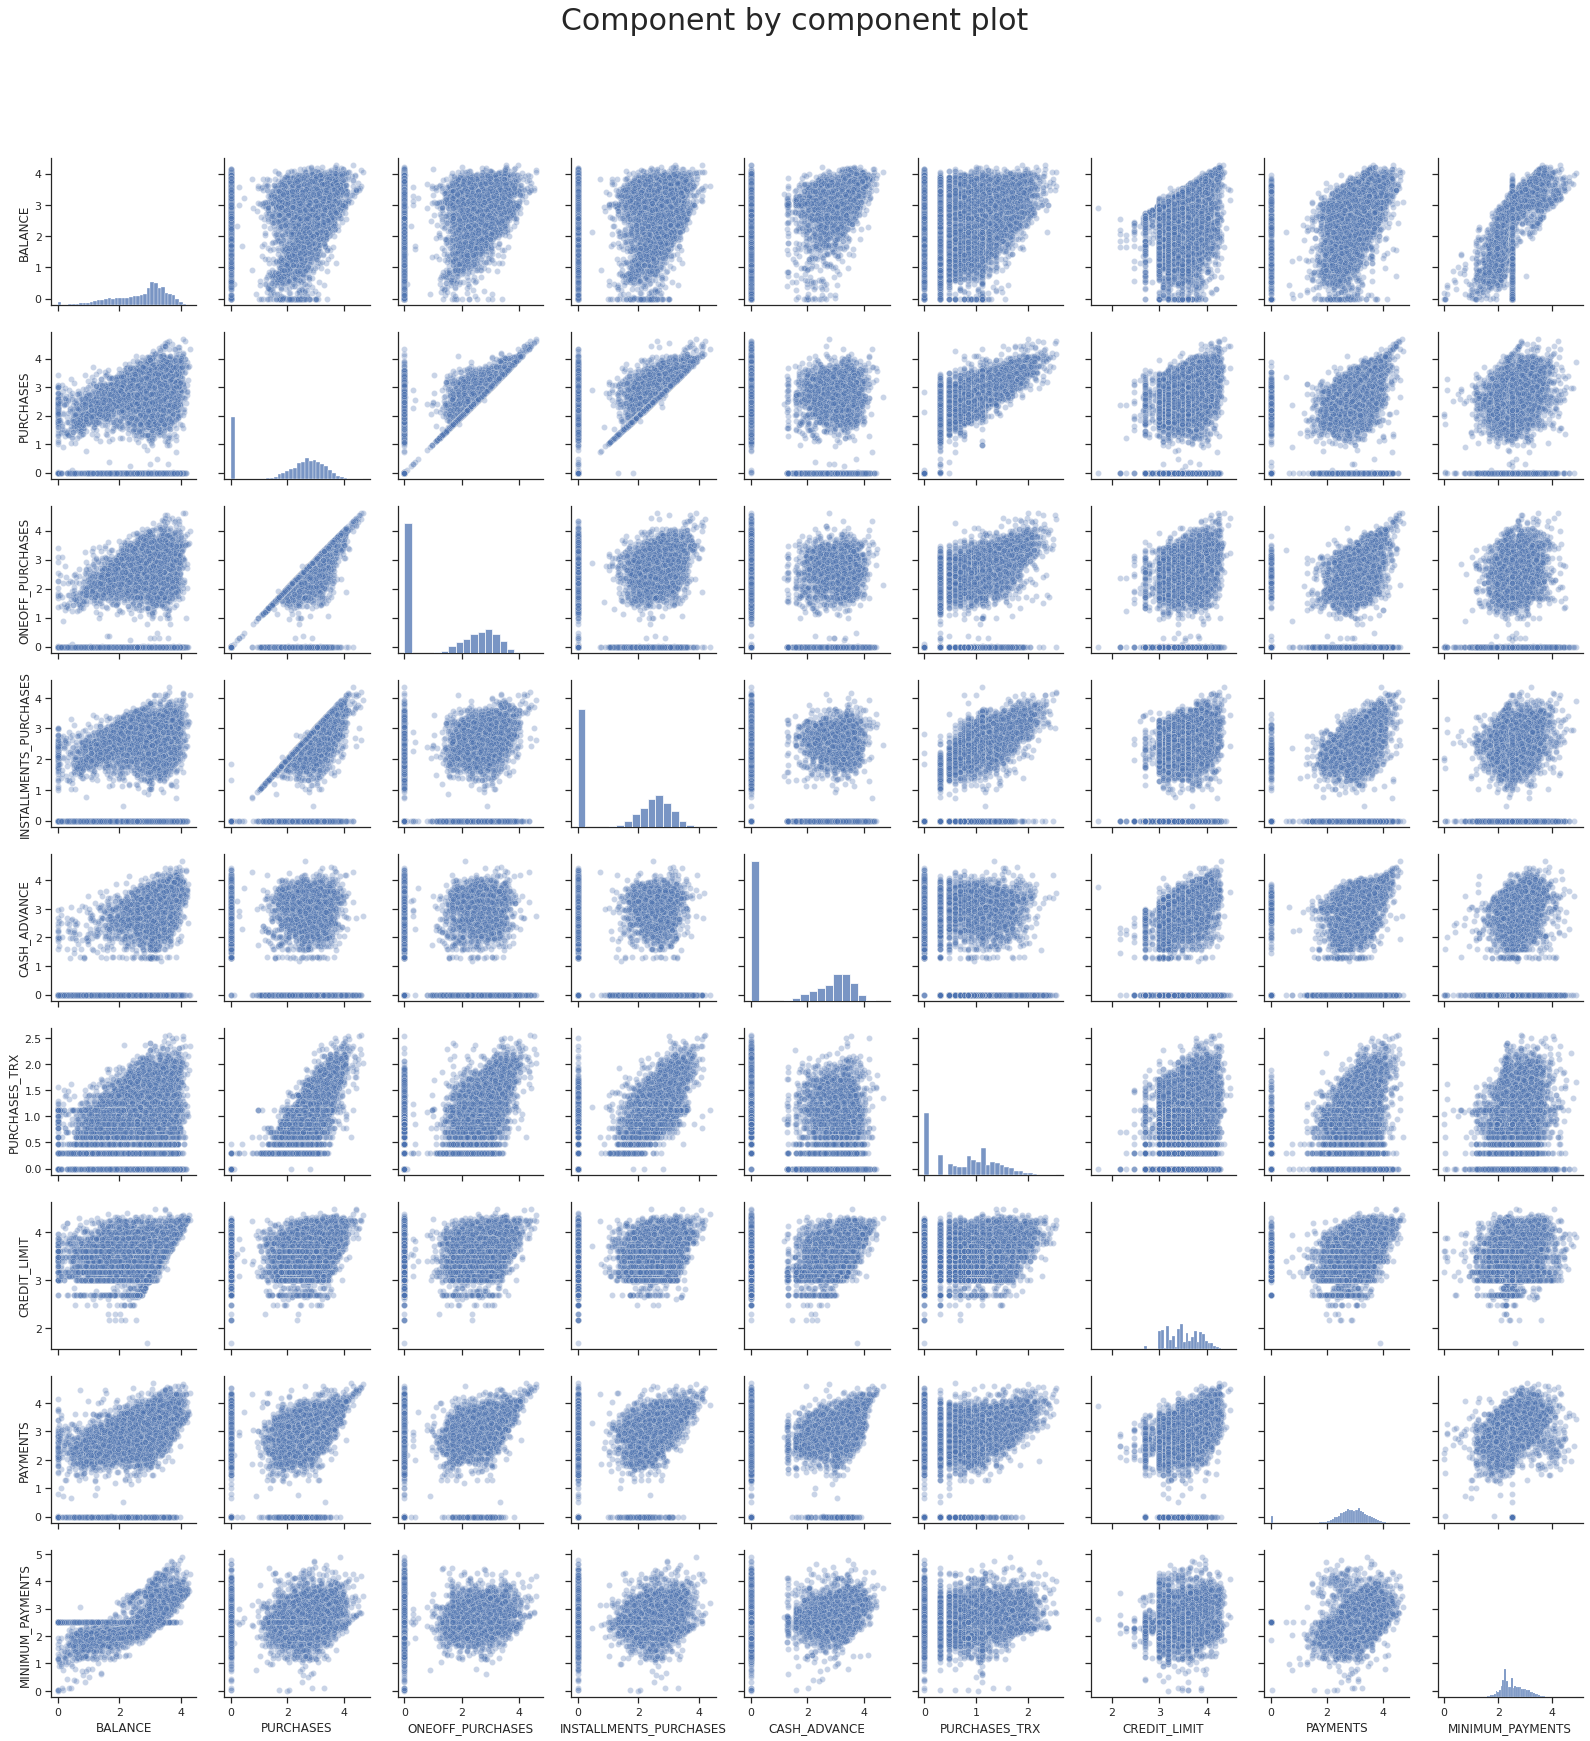

In [19]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_log = pd.DataFrame()
for c in [c for c in data.columns if data[c].dtype in numerics]:
    df_log[c] = np.log10(data[c]+1)

# Scaling is made because of the difference of magnitudes

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df_log), columns=df_log.columns)
# Component by component plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_log[cont_cols],  plot_kws={'alpha':0.3})
g.fig.suptitle("Component by component plot", fontsize=30, y=1.08)

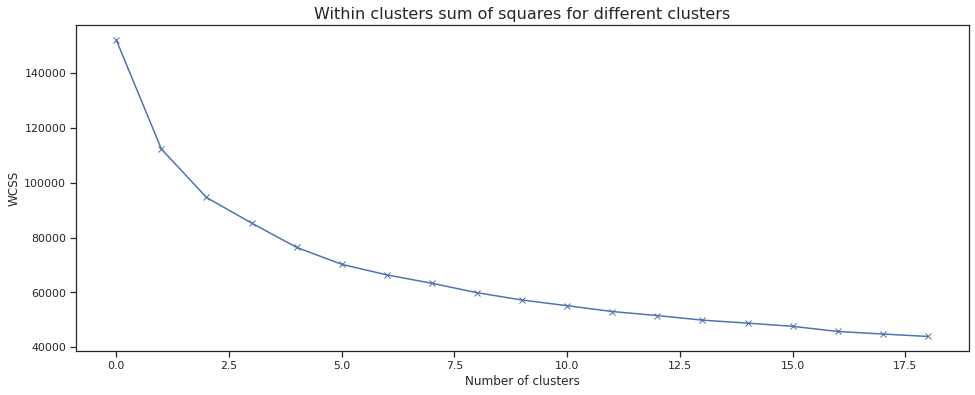

In [20]:
from sklearn.cluster import KMeans

sc = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    sc.append(kmeans.inertia_)

plt.figure(figsize = (16,6))
plt.plot(sc, 'bx-')
plt.title('Within clusters sum of squares for different clusters', size=16)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.25523177608583764


TypeError: ignored

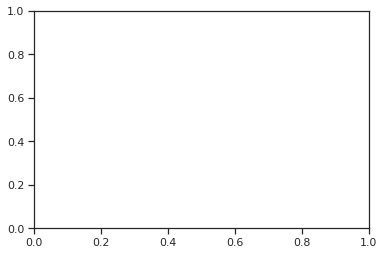

In [54]:
from sklearn.metrics import silhouette_score

range_n_clusters = [3, 4, 5, 6, 7, 8, 9]
sil_avgs = []
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, random_state=5)
    cluster_labels = clusterer.fit_predict(df)

    silhouette_avg = silhouette_score(df, cluster_labels, sample_size=500)
    sil_avgs.append(silhouette_avg)
    print("For n_clusters =", n,
          "The average silhouette_score is :", silhouette_avg)
    
    plt.scatter(data['PURCHASES'], data['ONEOFF_PURCHASES'], c=clusterer, s=50, label = 'c5')


plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()

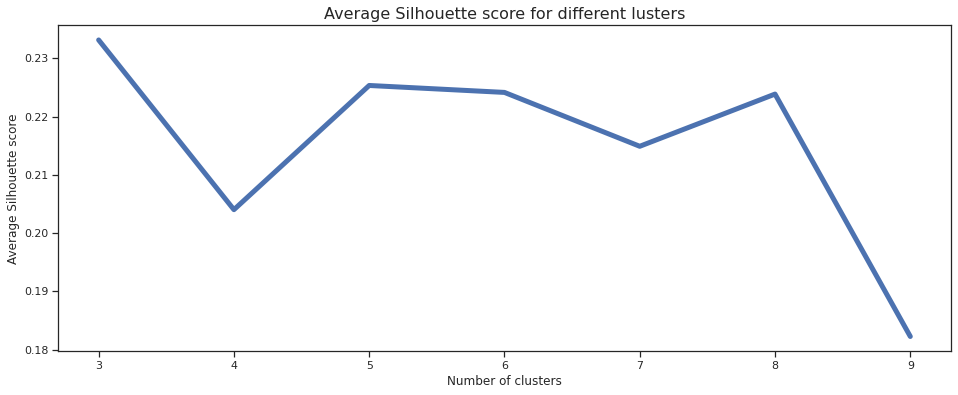

In [22]:
plt.figure(figsize = (16,6))
plt.plot(range_n_clusters,sil_avgs, linewidth=5)
plt.title('Average Silhouette score for different lusters', size=16)
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette score')
plt.show()

In [27]:
# Cluster segmentation with 7 different types

n=7
kmeans = KMeans(n)
kmeans.fit(df)
labels = kmeans.labels_
# Creating a dataframe with the centroid values of every cluster

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
# Saving the labels for every user into the dataframes previously created

data['Group'] = labels
df['Group'] = labels

# Changing the range of label from 0-6 to 1-7
data['Group'] = data['Group'] + 1
# Exact amount of users in every group
data['Group'].value_counts().to_frame()

,Group
2,2084
1,1683
5,1425
3,1271
6,1202
7,843
4,442


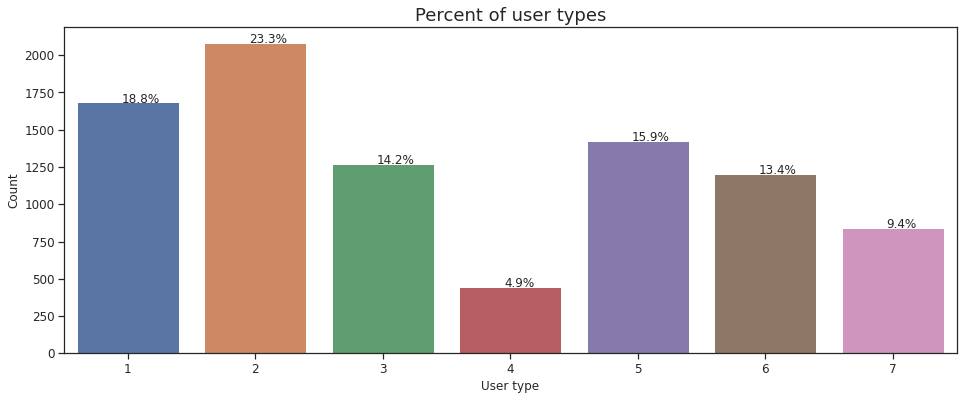

In [39]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

fig = plt.figure(figsize=(16,6))
ax = sns.countplot(x='Group', data=data)
plt.title('Percent of user types', size=18)
plt.xticks(size=12)
plt.xlabel('User type', size=12)
plt.yticks(size=12)
plt.ylabel('Count', size=12)
without_hue(ax, data.Group)

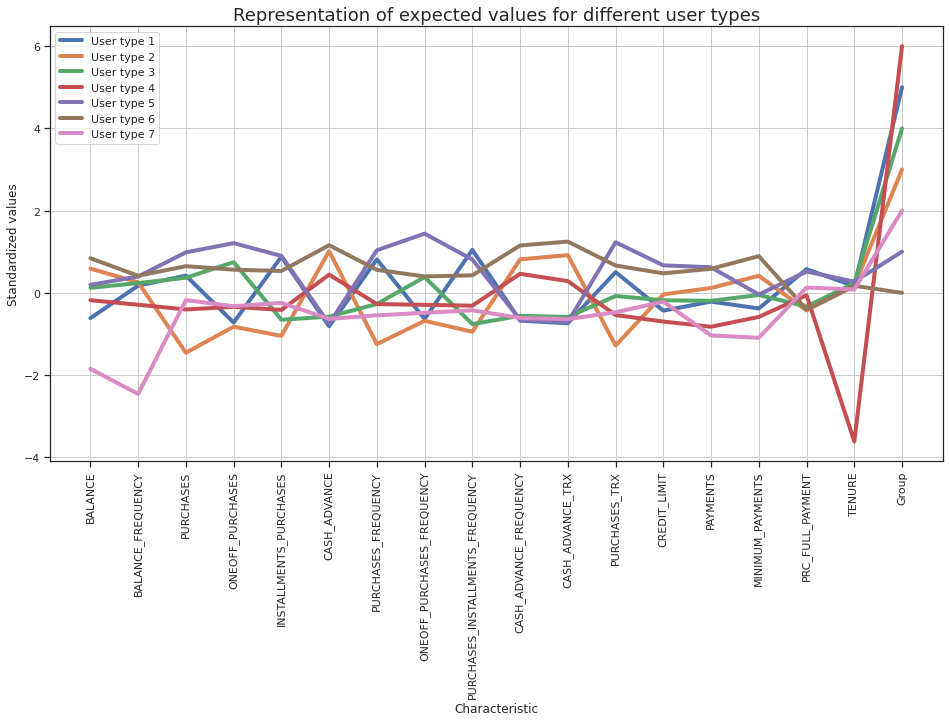

In [41]:
# Representation of expected values for different user types
# It represents whether a variable is high or low for that type of user (with standardized values)

plt.figure(figsize = (16,8))
for i in range(len(cluster_centers)):
    plt.plot(df.columns,cluster_centers.iloc[i].values, label='User type '+str(i+1), linewidth=4)
plt.title('Representation of expected values for different user types', size=18)
plt.xlabel("Characteristic")
plt.ylabel("Standardized values")
plt.xticks(rotation='vertical')
plt.grid()
plt.legend()
plt.show()

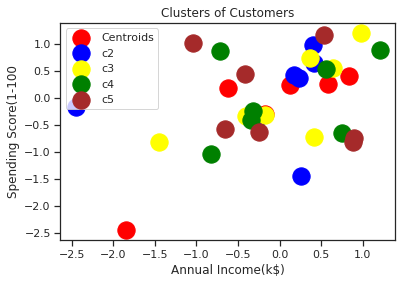

In [47]:
# plt.scatter(data["CASH_ADVANCE"],          
#             data["PAYMENTS"],s=80,c='magenta',data='Careful')
# plt.scatter(data["CASH_ADVANCE"],
#            data["PAYMENTS"],s=80,c='yellow',label='Standard')
# plt.scatter(data["CASH_ADVANCE"],
#            data["PAYMENTS"],s=80,c='green',label='Target')
# plt.scatter(data["CASH_ADVANCE"], 
#            data["PAYMENTS"],s=80,c='cyan',label='Careless')
# plt.scatter(data["CASH_ADVANCE"], 
#            data["PAYMENTS"],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='blue', label = 'c2')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='yellow', label = 'c3')
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 4], s=300, c='green', label = 'c4')
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=300, c='brown', label = 'c5')


plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()

In [31]:
# Mean characteristic values of every type of user
data.groupby('Group').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Group,,,,,,,,,,,,,,,,,
1,441.982730,0.914593,650.219750,34.072507,617.167190,36.166760,0.813329,0.023010,0.775551,0.008328,0.135472,14.707665,3018.080838,818.714261,673.290165,0.316110,11.730838
2,2377.068799,0.937871,19.417989,17.107620,2.368752,2095.248953,0.016938,0.011911,0.004164,0.286467,6.902591,0.239923,4273.930524,1776.069138,1087.469689,0.031270,11.729367
3,1125.534489,0.931889,722.144335,676.845523,45.635460,128.842254,0.353136,0.297128,0.063773,0.028023,0.440598,7.036192,3814.144196,1044.346673,647.564407,0.058811,11.830842
4,943.550005,0.797043,324.318846,203.610362,120.776357,1277.012860,0.381191,0.115058,0.240515,0.224835,3.556561,4.269231,2451.842646,593.104578,327.436489,0.139173,6.807692
5,1525.736868,0.973862,3386.230246,2209.104407,1177.125839,51.827238,0.918022,0.631795,0.682798,0.012160,0.178947,44.980351,6916.661705,3110.364422,706.228617,0.305131,11.891228
6,3540.984173,0.978669,1456.524651,828.922080,627.869634,2840.801580,0.701268,0.307567,0.523212,0.358064,9.782030,23.551581,6123.544093,3164.646254,1716.362427,0.037460,11.742928
7,31.245488,0.304810,245.054828,136.077817,109.059454,138.592503,0.256321,0.059241,0.188058,0.018756,0.378410,3.753262,3666.413602,719.718088,148.584431,0.192722,11.609727


In [32]:
# Median characteristic values of every type of user
data.groupby('Group').median()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Group,,,,,,,,,,,,,,,,,
1,102.011668,1.000000,457.680,0.00,430.54,0.000000,0.916667,0.000000,0.833333,0.000000,0.0,12.0,2200.0,548.458069,172.482173,0.142857,12.0
2,1646.214255,1.000000,0.000,0.00,0.00,1337.715879,0.000000,0.000000,0.000000,0.250000,4.0,0.0,3000.0,871.187278,547.532683,0.000000,12.0
3,867.728471,1.000000,450.000,400.60,0.00,0.000000,0.272727,0.250000,0.000000,0.000000,0.0,5.0,2700.0,615.697560,310.111406,0.000000,12.0
4,577.815457,0.857143,152.305,0.00,0.00,825.410941,0.222222,0.000000,0.000000,0.166667,2.0,2.0,1500.0,250.226150,183.658244,0.000000,7.0
5,710.199118,1.000000,2326.710,1319.04,737.50,0.000000,1.000000,0.666667,0.750000,0.000000,0.0,33.0,6500.0,2034.867192,239.173819,0.083333,12.0
6,2790.631898,1.000000,918.875,410.30,333.05,1897.163378,0.750000,0.250000,0.500000,0.333333,7.0,14.0,5500.0,1865.652268,1050.820416,0.000000,12.0
7,10.954457,0.272727,123.500,0.00,30.90,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,3000.0,268.128456,117.833863,0.000000,12.0
